In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Adding underscore in column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Selecting string column
string_columns = list(df.dtypes[df.dtypes == "object"].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [4]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

<AxesSubplot:xlabel='msrp', ylabel='Count'>

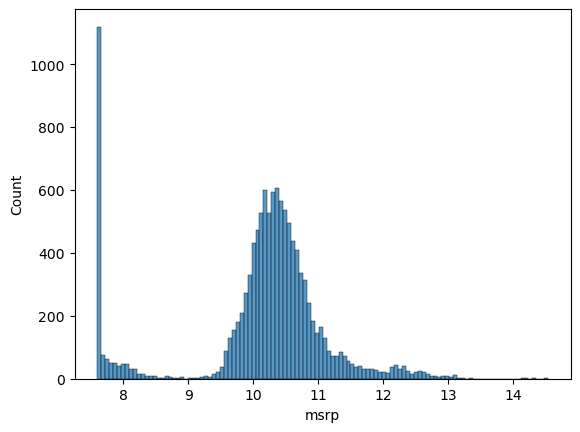

In [5]:
# Remove longer tail by log transformation
# +1 is important for 0 values 
from math import log1p


log_price = np.log1p(df.msrp)
sns.histplot(log_price)

In [6]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val - n_test)

np.random.seed(123)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(df_train["msrp"].values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)




In [7]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]



In [8]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [9]:
df_num = df_num.fillna(0)
X_train = df_num.values
X_train

array([[ 113.,    4.,   30.,   23.,  535.],
       [ 453.,   12.,   19.,   11.,   86.],
       [ 278.,    6.,   23.,   18., 2031.],
       ...,
       [ 170.,    6.,   27.,   18.,   26.],
       [ 128.,    4.,   33.,   27.,  105.],
       [ 240.,    4.,   26.,   20.,  258.]])

In [10]:
w_0, w = train_linear_regression(X_train, y_train)

In [11]:
y_pred = w_0 + np.dot(X_train, w)

In [12]:
y_pred

array([ 9.18266839, 10.92195958, 10.24505653, ...,  9.33353787,
        9.43041337, 10.27181188])

In [13]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [15]:
rmse(y_train, y_pred)

0.7521618752279218